In [1]:
import numpy as np
import itertools
import math

In [2]:
from SetupDeterministicTransition import *
from SetupRewardTable import *
from BoltzmannValueIteration import *
from GoalInferenceVisualizations import *

# Examples

## Environment 1: Solid Barrier

### Set up Environment Parameters

In [3]:
goalStates = [(6,4, "A"), (6,1, "B"),(1,5,"C")]

gridWidth = 7
gridHeight = 6
allActions = [(1,0), (0,1), (-1,0), (0,-1),(-1,1), (1,-1), (1,1), (-1,-1)]
trapStates = [(3,0), (3,1), (3,2), (3,3)]
convergenceThreshold = 10e-7
gamma = .95
beta = .4

getTransition = SetupDeterministicTransition(gridWidth, gridHeight, allActions)
transition = getTransition()

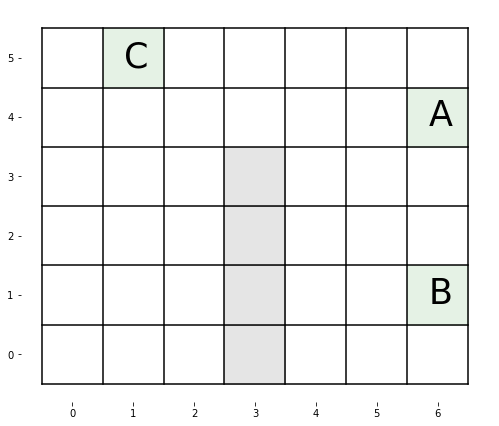

In [4]:
visualizeEnvironment(gridWidth, gridHeight, goalStates, trapStates, trajectory = [])

### Get Goal Boltzmann Policies

In [5]:
goalStateA = (6,4)
getRewardA = SetupRewardTableLeaveGoal(transition, allActions, goalStateA, trapStates)
rewardA = getRewardA()
valueA = {state:0 for state in rewardA.keys()}

performValueIterationA = BoltzmannValueIteration(transition, rewardA, valueA, convergenceThreshold, gamma, beta)
optimalValuesA, policyA = performValueIterationA()

In [6]:
goalStateB = (6,4)

getRewardB = SetupRewardTableLeaveGoal(transition, allActions, goalStateB, trapStates)
rewardB = getRewardB()
valueB = {state:0 for state in rewardB.keys()}

performValueIterationB = BoltzmannValueIteration(transition, rewardB, valueB, convergenceThreshold, gamma, beta)
optimalValuesB, policyB = performValueIterationB()

In [7]:
goalStateC = (1,5)

getRewardC = SetupRewardTableLeaveGoal(transition, allActions, goalStateC, trapStates)
rewardC = getRewardC()
valueC = {state:0 for state in rewardC.keys()}

performValueIterationC = BoltzmannValueIteration(transition, rewardC, valueC, convergenceThreshold, gamma, beta)
optimalValuesC, policyC = performValueIterationC()

### Visualizations

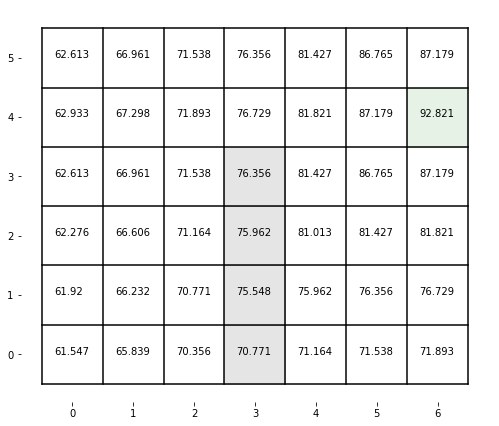

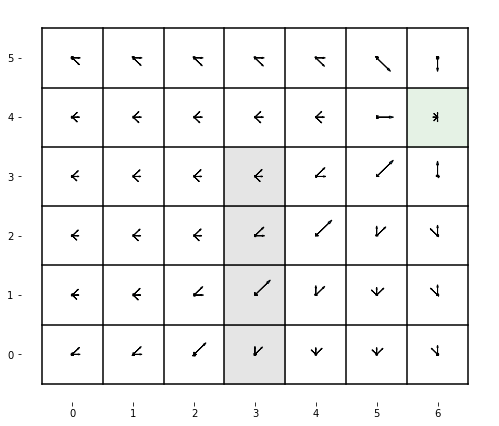

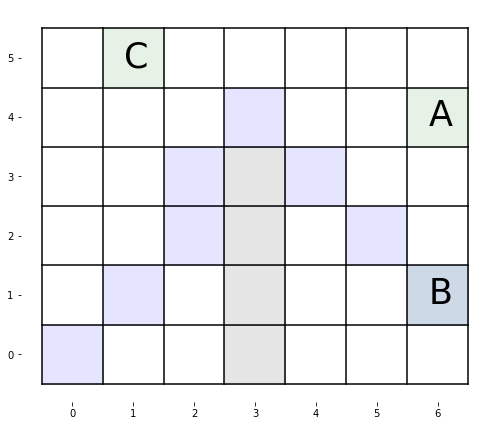

In [8]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateA, trapStates = trapStates, valueTable = optimalValuesA)
visualizePolicy(gridWidth, gridHeight, goalStateA, trapStates, policyA)
trajectoryToGoalA = [(0,0), (1,1), (2,2), (2,3), (3,4), (4,3), (5,2), (6,1)]
visualizeEnvironment(gridWidth, gridHeight, goalStates, trapStates, trajectory = trajectoryToGoalA)

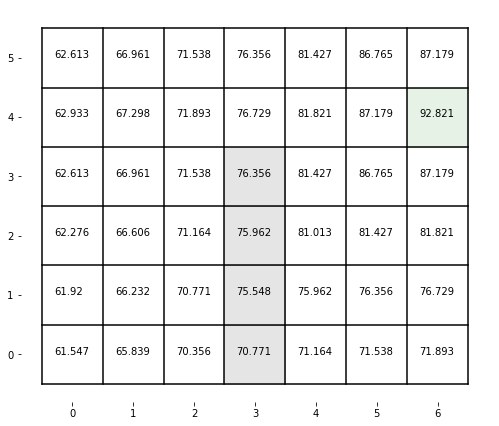

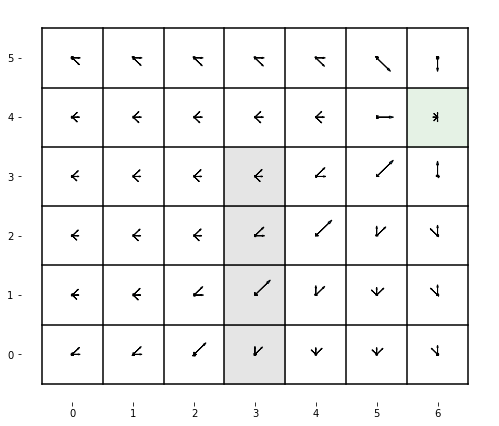

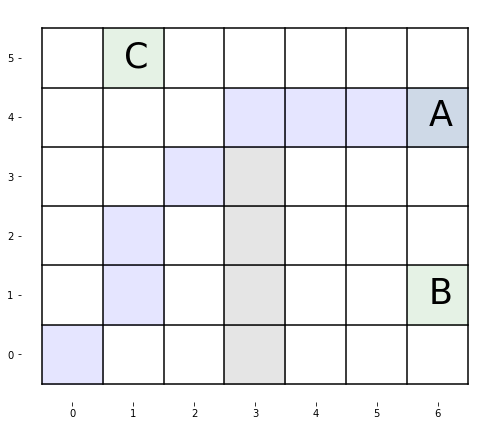

In [9]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateB, trapStates = trapStates, valueTable = optimalValuesB)
visualizePolicy(gridWidth, gridHeight, goalStateB, trapStates, policyB)
trajectoryToGoalB = [(0,0), (1,1), (1,2), (2,3), (3,4), (4,4), (5,4), (6,4)]
visualizeEnvironment(gridWidth, gridHeight, goalStates, trapStates, trajectory = trajectoryToGoalB)

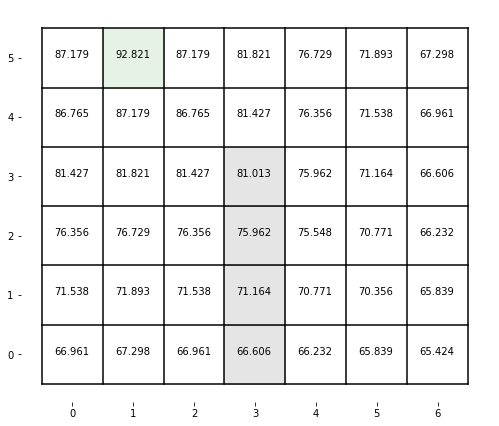

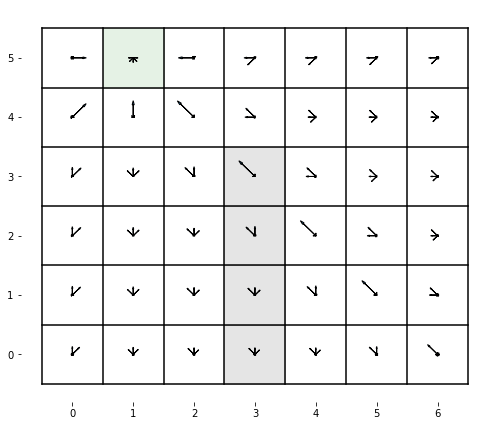

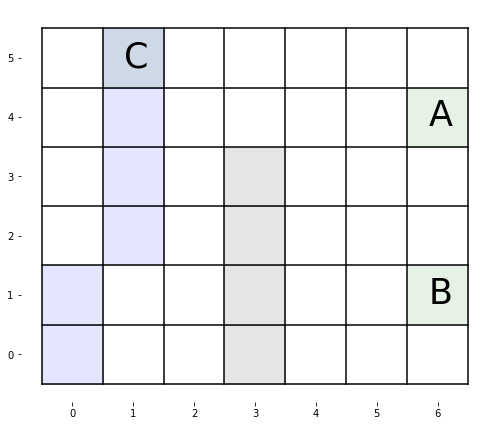

In [10]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateC, trapStates = trapStates, valueTable = optimalValuesC)
visualizePolicy(gridWidth, gridHeight, goalStateC, trapStates, policyC)
trajectoryToGoalC = [(0,0), (0,1), (1,2), (1,3), (1,4), (1,5)]
visualizeEnvironment(gridWidth, gridHeight, goalStates, trapStates, trajectory = trajectoryToGoalC)

## Example 2 - Barrier with Gap

### Environment Parameters

In [11]:
gridWidth = 7
gridHeight = 6
allActions = [(1,0), (0,1), (-1,0), (0,-1), (-1,1), (1,-1), (1,1), (-1,-1)]
trapStates = [(3,0), (3,2), (3,3)]
convergenceThreshold = 10e-7
gamma = .95
beta = .4

getTransition = SetupDeterministicTransition(gridWidth, gridHeight, allActions)
transition = getTransition()

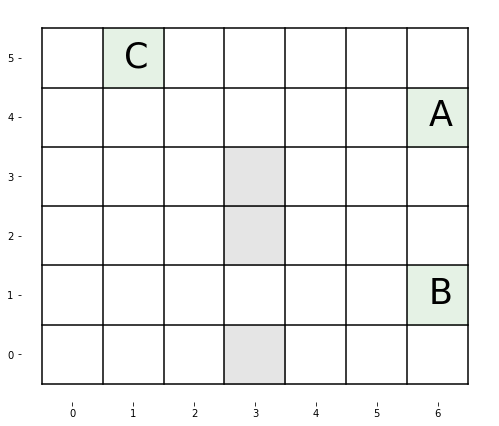

In [12]:
visualizeEnvironment(gridWidth, gridHeight, goalStates, trapStates, trajectory = [])

### Goal Setup

In [13]:
goalStateA = (6,4)

env2getRewardA = SetupRewardTableLeaveGoal(transition, allActions, goalStateA, trapStates)
env2rewardA = env2getRewardA()
env2valueA = {state:0 for state in env2rewardA.keys()}

env2performValueIterationA = BoltzmannValueIteration(transition, env2rewardA, env2valueA, convergenceThreshold, gamma, beta)
env2optimalValuesA, env2policyA = env2performValueIterationA()

In [14]:
goalStateB = (6,1)

env2getRewardB = SetupRewardTableLeaveGoal(transition, allActions, goalStateB, trapStates)
env2rewardB = env2getRewardB()
env2valueB = {state:0 for state in env2rewardB.keys()}

env2performValueIterationB = BoltzmannValueIteration(transition, env2rewardB, env2valueB, convergenceThreshold, gamma, beta)
env2optimalValuesB, env2policyB = env2performValueIterationB()

In [15]:
goalStateC = (1,5)

env2getRewardC = SetupRewardTableLeaveGoal(transition, allActions, goalStateC, trapStates)
env2rewardC = env2getRewardC()
env2valueC = {state:0 for state in env2rewardC.keys()}

env2performValueIterationC = BoltzmannValueIteration(transition, env2rewardC, env2valueC, convergenceThreshold, gamma, beta)
env2optimalValuesC, env2policyC = env2performValueIterationC()

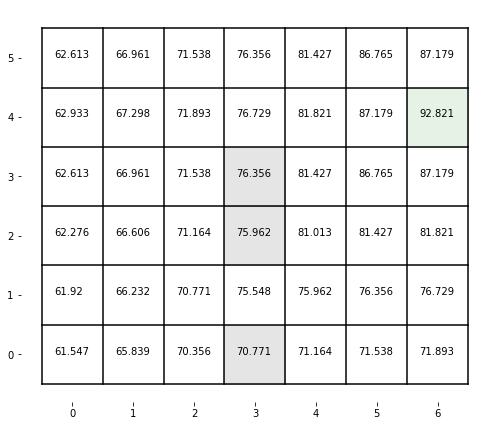

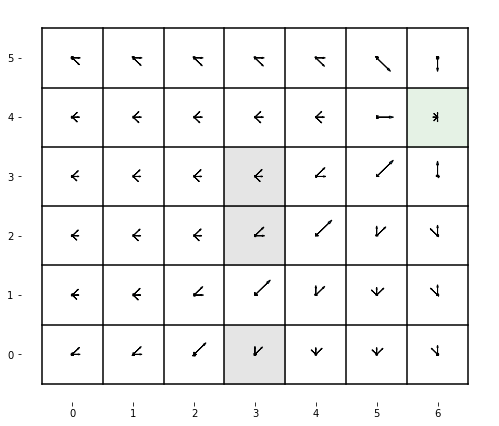

In [16]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateA, trapStates = trapStates, valueTable = env2optimalValuesA)
visualizePolicy(gridWidth, gridHeight, goalStateA, trapStates, env2policyA)

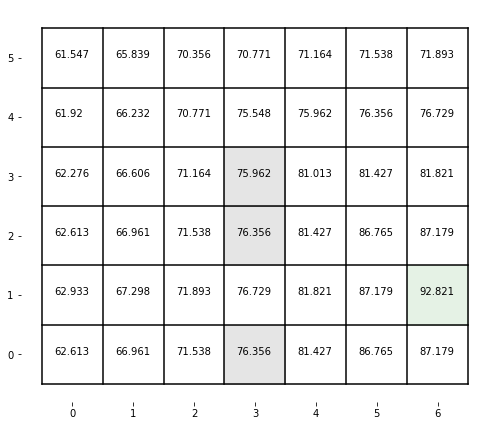

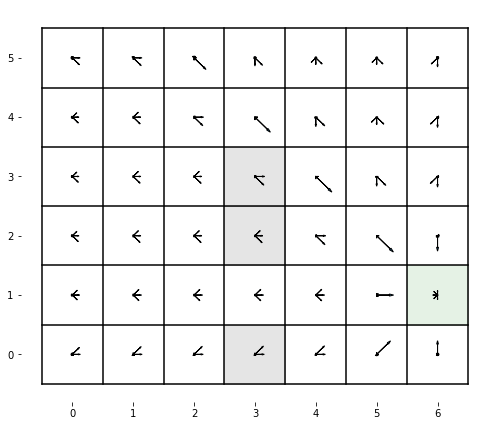

In [17]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateB, trapStates = trapStates, valueTable = env2optimalValuesB)
visualizePolicy(gridWidth, gridHeight, goalStateB, trapStates, env2policyB)

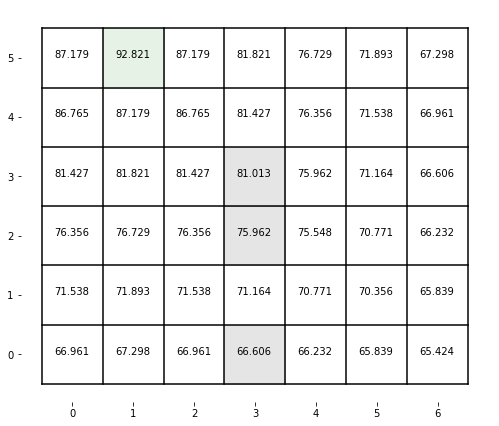

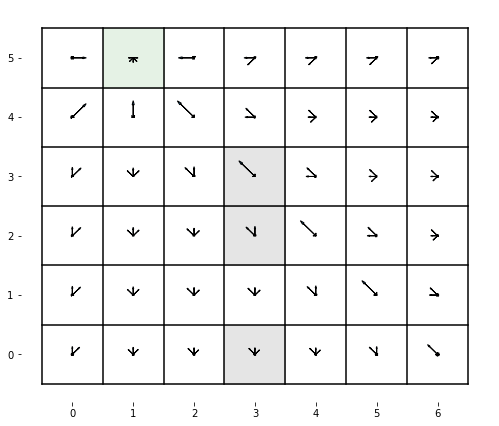

In [18]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateC, trapStates = trapStates, valueTable = env2optimalValuesC)
visualizePolicy(gridWidth, gridHeight, goalStateC, trapStates, env2policyC)